# Ejercicio Learning OpenCV Cap.7 Ejercicio 2

In [21]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy.spatial import distance as dist

### Tomar 3 imagenes con las condiciones: 

* Iluminación en interior
* Iluminación en exterior dia con sombra
+ Iluminación en exterior dia soleado
    
#### Tomar las imagenes en escala de gris y graficar el histograma de la imagen en interior con la función cvCalcHist()
    
2. Try using just a few large bins (e.g., 2 per dimension), a medium number of bins (16 per dimension) and many bins (256 per dimension). Then run a matching routine (using all histogram matching methods) against the other indoor lighting images of hands. Describe what you find.

1. Now add 8 and then 32 bins per dimension and try matching across lighting conditions (train on indoor, test on outdoor). Describe the results.
    
    
    

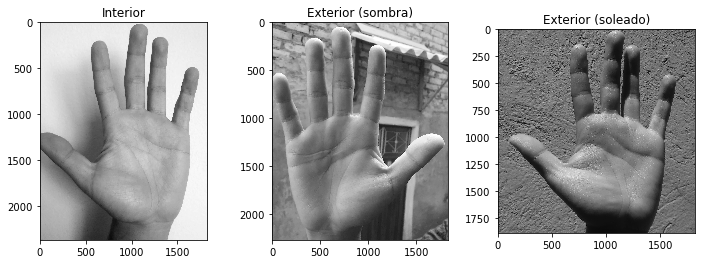

In [70]:
images = [('Interior','interior.jpg'),
          ('Exterior (sombra)','ext_som.jpg'),
          ('Exterior (soleado)','ext_sol.jpg')
         ]

data = []

#Lectura de imagenes
for (name, path) in images:
    data.append(cv2.imread(path,0))

f, sub = plt.subplots(1,len(images))
f.set_size_inches(4*len(images),4)

i = 0
for name, path in images :
    sub[i].imshow(data[i], cmap='gray'); sub[i].set_title(name)
    i += 1

plt.show()

## Histogramas

### 256 bins

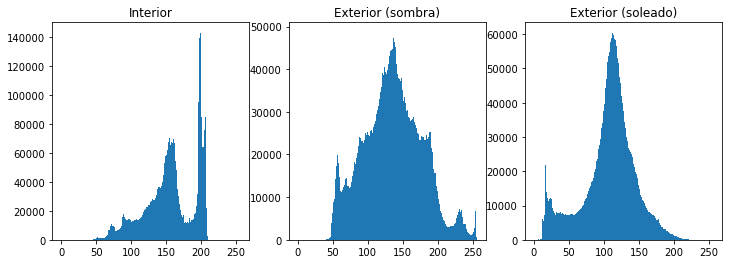

In [94]:
hist = []

#determinar el tamaño de las graficas
f, sub = plt.subplots(1,len(images))
f.set_size_inches(4*len(images),4)

#Calcular los histogramas
i = 0
for name, path in images :
    hist.append(cv2.calcHist([data[i]], [0], None, [256], [0,256]))
    sub[i].hist(data[i].ravel(),256, [0,256]); sub[i].set_title(name)
    i += 1

plt.show()

## Comparar histogramas ($10^5$)

In [133]:
#Comparar histogramas

names = ('Interior','Exterior (sombra)','Exterior (soleado)')
method = ("Correlacion", "Chi cuadrado", "Intersección", "distancia de Bhattacharyya")
method_n =(cv2.HISTCMP_CORREL, cv2.HISTCMP_CHISQR, cv2.HISTCMP_INTERSECT, cv2.HISTCMP_BHATTACHARYYA)
for i in range(len(methods)):
    print methods[i]
    print '\t\t|'.join(names)
    for h in hist:
        aux = []
        for h2 in hist:
            aux.append('\t%.3f\t\t' %(cv2.compareHist(h,h2,method_n[i])/10e5))
        print '|'.join(aux)
    "_____________________________________________________________"
    print "\n"

Correlacion
Interior		|Exterior (sombra)		|Exterior (soleado)
	0.000		|	0.000		|	0.000		
	0.000		|	0.000		|	0.000		
	0.000		|	0.000		|	0.000		


Chi cuadrado
Interior		|Exterior (sombra)		|Exterior (soleado)
	0.000		|	12.788		|	104.271		
	10.493		|	0.000		|	466.795		
	96.655		|	39.002		|	0.000		


Intersección
Interior		|Exterior (sombra)		|Exterior (soleado)
	4.328		|	2.703		|	1.725		
	2.703		|	4.138		|	2.486		
	1.725		|	2.486		|	3.436		


distancia de Bhattacharyya
Interior		|Exterior (sombra)		|Exterior (soleado)
	0.000		|	0.000		|	0.000		
	0.000		|	0.000		|	0.000		
	0.000		|	0.000		|	0.000		




### 16 por dimención

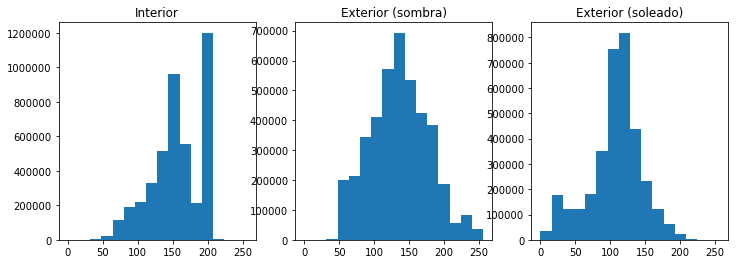

In [134]:
hist = []

#determinar el tamaño de las graficas
f, sub = plt.subplots(1,len(images))
f.set_size_inches(4*len(images),4)

#Calcular los histogramas
i = 0
for name, path in images :
    hist.append(cv2.calcHist([data[i]], [0], None, [256], [0,256]))
    sub[i].hist(data[i].ravel(),16, [0,256]); sub[i].set_title(name)
    i += 1

plt.show()

In [135]:
#Comparar histogramas

names = ('Interior','Exterior (sombra)','Exterior (soleado)')
method = ("Correlacion", "Chi cuadrado", "Intersección", "distancia de Bhattacharyya")
method_n =(cv2.HISTCMP_CORREL, cv2.HISTCMP_CHISQR, cv2.HISTCMP_INTERSECT, cv2.HISTCMP_BHATTACHARYYA)
for i in range(len(methods)):
    print methods[i]
    print '\t\t|'.join(names)
    for h in hist:
        aux = []
        for h2 in hist:
            aux.append('\t%.3f\t\t' %(cv2.compareHist(h,h2,method_n[i])/10e5))
        print '|'.join(aux)
    "_____________________________________________________________"
    print "\n"

Correlacion
Interior		|Exterior (sombra)		|Exterior (soleado)
	0.000		|	0.000		|	0.000		
	0.000		|	0.000		|	0.000		
	0.000		|	0.000		|	0.000		


Chi cuadrado
Interior		|Exterior (sombra)		|Exterior (soleado)
	0.000		|	12.788		|	104.271		
	10.493		|	0.000		|	466.795		
	96.655		|	39.002		|	0.000		


Intersección
Interior		|Exterior (sombra)		|Exterior (soleado)
	4.328		|	2.703		|	1.725		
	2.703		|	4.138		|	2.486		
	1.725		|	2.486		|	3.436		


distancia de Bhattacharyya
Interior		|Exterior (sombra)		|Exterior (soleado)
	0.000		|	0.000		|	0.000		
	0.000		|	0.000		|	0.000		
	0.000		|	0.000		|	0.000		




### 2 por dimención

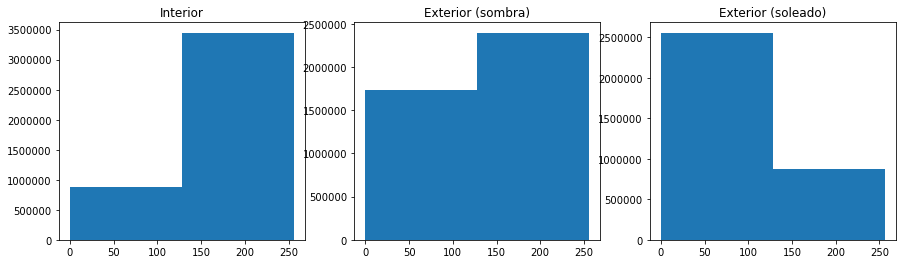

In [20]:
f, sub = plt.subplots(1,3)
f.set_size_inches(15,4)

sub[0].hist(interior.ravel(),2, [0,256]); sub[0].set_title('Interior')
sub[1].hist(ext_som.ravel(),2, [0,256]); sub[1].set_title('Exterior (sombra)')
sub[2].hist(ext_sol.ravel(),2, [0,256]); sub[2].set_title('Exterior (soleado)')

plt.show()

In [137]:
#Comparar histogramas

names = ('Interior','Exterior (sombra)','Exterior (soleado)')
method = ("Correlacion", "Chi cuadrado", "Intersección", "distancia de Bhattacharyya")
method_n =(cv2.HISTCMP_CORREL, cv2.HISTCMP_CHISQR, cv2.HISTCMP_INTERSECT, cv2.HISTCMP_BHATTACHARYYA)
for i in range(len(methods)):
    print methods[i]
    print '\t\t|'.join(names)
    for h in hist:
        aux = []
        for h2 in hist:
            aux.append('\t%.3f\t\t' %(cv2.compareHist(h,h2,method_n[i])/10e5))
        print '|'.join(aux)
    "_____________________________________________________________"
    print "\n"

Correlacion
Interior		|Exterior (sombra)		|Exterior (soleado)
	0.000		|	0.000		|	0.000		
	0.000		|	0.000		|	0.000		
	0.000		|	0.000		|	0.000		


Chi cuadrado
Interior		|Exterior (sombra)		|Exterior (soleado)
	0.000		|	12.788		|	104.271		
	10.493		|	0.000		|	466.795		
	96.655		|	39.002		|	0.000		


Intersección
Interior		|Exterior (sombra)		|Exterior (soleado)
	4.328		|	2.703		|	1.725		
	2.703		|	4.138		|	2.486		
	1.725		|	2.486		|	3.436		


distancia de Bhattacharyya
Interior		|Exterior (sombra)		|Exterior (soleado)
	0.000		|	0.000		|	0.000		
	0.000		|	0.000		|	0.000		
	0.000		|	0.000		|	0.000		


